### Business Problem
The declaration of environmental distress normally is declared from one day to the next, with no forewarning, when the levels of pollution reach a threshold that endanger the health of citizens. The measures to mitigate the pollution levels encompass: transit restrictions of a share of private vehicles, closure of some factory types identified as high producers of air pollutants, suspension of physical activities, etc..
We want to create a model to forecast, with a degree of forewarning, a situation of environmental distress and implement preventive measures that affect less drastically the life and economy of the citizens and in the best scenario prevent the emergency distress to be declared by establishing ahead measures that reduce the pollution and prevent the levels from hitting the threshold.

![Mexico City Air pollution](https://images.clarin.com/2019/05/08/vista-del-velo-de-contaminacion___XWTFrWFvT_1256x620__1.jpg)
*Source: https://www.clarin.com/mundo/levantan-emergencia-ambiental-contaminacion-ciudad-mexico_0_bDZL63I2B.html*

### Business Impact
Declaring environmental distress is a mandatory mechanism from the government to reduce the levels of certain air pollutants in the short-term. This can affect economic activities associated with transportation, energy consumption and generation, and have an impact in the health of the population of affected areas. Providing a model which can evaluate the risk of an environmental distress being called out by the government may be useful for business, people, organizations and other stakeholders to plan their activities better.


In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import json
import seaborn as sns
import plotly.express as px


 #allowing importing GDrive files
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from google.colab import files
#from oauth2client.client import GoogleCredentials

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Weather Data
Our main source of weather data is the National Centers for Environmental Information (NCEI). They publish detailed historical weather data on various places, including Mexico City. We already identified MX City as hacing the weather station code '76680099999', and therefore have downloaded only the relevant files and combined them. The file includes multiple daily readings from 1990 to today.

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/DS4A-MX7/config_anahuac_copy.json'

with open(path) as f:
    config_file = json.load(f)
    
# connecting to external database
import psycopg2
import pandas as pd
pd.options.display.max_columns = 500
connection = psycopg2.connect(user = config_file['user'],
                            password = config_file['password'],
                            host= config_file['host'],
                            port = "5432",
                            database = config_file['dbname'])

cursor = connection.cursor()
def runquery(query):
    df=pd.read_sql(query,connection)
    return df

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



In [0]:
sqlQuery_weather = "select * from raw_metrics.weather where date >= '1995-01-01'::date ORDER BY date asc;"

df_weather = pd.DataFrame(runquery(sqlQuery_weather))

In [0]:
sqlQuery_rama = "select * from raw_metrics.rama where date >= '1995-01-01'::date ORDER BY date asc;"

df_rama = pd.DataFrame(runquery(sqlQuery_rama))

,date,fecha,hora,factor,aco,ajm,aju,ara,ati,azc,bju,cam,cca,ces,cho,coy,cua,cui,cut,fac,far,gam,han,hgm,imp,inn,izt,lag,lla,lpr,lvi,mer,mgh,min,mon,mpa,net,nez,ped,per,pla,sac,sag,sfe,sja,sur,tac,tah,tax,tla,tli,tpn,uax,uiz,val,vif,xal
5,1995-01-01 00:00:00,1995-01-01,0,O3,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,None,NaN,8.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN,13.0,NaN,NaN,NaN,14.0,NaN,NaN,14.0,NaN,NaN,NaN,29.0,NaN,NaN,10.0
6,1995-01-01 01:00:00,1995-01-01,1,O3,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,None,NaN,8.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,6.0,NaN,15.0,NaN,NaN,NaN,16.0,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,24.0
16,1995-01-01 02:00:00,1995-01-01,2,O3,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,None,NaN,11.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,5.0,NaN,17.0,NaN,NaN,NaN,26.0,NaN,NaN,17.0,NaN,NaN,NaN,23.0,NaN,NaN,36.0
18,1995-01-01 03:00:00,1995-01-01,3,O3,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,None,NaN,11.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,4.0,NaN,19.0,NaN,NaN,NaN,23.0,NaN,NaN,18.0,NaN,NaN,NaN,39.0,NaN,NaN,23.0
29,1995-01-01 04:00:00,1995-01-01,4,O3,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,None,NaN,9.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,3.0,NaN,14.0,NaN,NaN,NaN,18.0,NaN,NaN,13.0,NaN,NaN,NaN,27.0,NaN,NaN,19.0


In [0]:
#checking data
print(df_weather.shape)
print(df_weather.columns)

(42752, 45)
Index(['index', 'station', 'date', 'source', 'latitude', 'longitude',
       'elevation', 'name', 'report_type', 'call_sign', 'quality_control',
       'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'aa1', 'aa2', 'aa3', 'ag1',
       'aj1', 'ay1', 'ay2', 'ga1', 'ga2', 'ga3', 'ga4', 'gf1', 'gj1', 'gm1',
       'ia1', 'ia2', 'ic1', 'ka1', 'ka2', 'ma1', 'md1', 'mw1', 'rem', 'eqd',
       'unnamed_40', 'unnamed_41', 'unnamed_42', 'geometry'],
      dtype='object')


We can see that we have 42,752 readings, and 45 columns. We can also already see that certain cells contain multiple different data types.

We have the following interesting columns:
- **date**: date/time of the reading
- **wnd**: Windspeed in the format of direction_angle,qualitycontrol,type,speed
- **tmp**: Temperature in the format of degrees(celsius),qualitycontrol with scaling factor 10 (ie. +0112 = 11,2°C)
- **vis**: Horizontal visibility in meters
- **aa1/aa2/aa3**: Rain period quantity (hours),depth dimension (mm, scaling factor 10),condition code,quality code

The first thing we want to do is understand how our data is distributed: 
- how many days do we have readings for, and
- how many readings do we have per day

####Missing data

In [0]:
start = df_weather['date'].min()
end = df_weather['date'].max()
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

#creating a list of all dates in range
all_dates_range = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
#creating a list of dates we have in our dataset
unique_dates = df_weather['date'].dt.date.unique()

#creating a list of all dates that are in all_dates_range, but not in unique_dates
missing_dates = [ i for i in all_dates_range if i not in unique_dates]
print('Total missing dates: ', len(missing_dates))
print()

#We have 740 dates for which we are missing readings. We now want to figure out how these are distributed over the years.

df2 = [ str(i).split('-')[0] for i in missing_dates]
df3 = pd.DataFrame()
df3['Year']=df2
print('Distribution of missing dates by year:')
#df3['Year'].value_counts()

#We can see that the years 2000-2005 have the most missing dates

Total missing dates:  740

Distribution of missing dates by year:


In [0]:
date_df = pd.DataFrame(pd.date_range(start='1/1/2012', end='5/01/2020', freq='H'), columns=['date'])
#date_df.set_index(pd.DatetimeIndex(date_df['date']), inplace=True)
date_df.columns

Index(['date'], dtype='object')

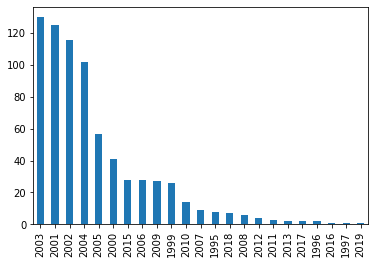

In [0]:
fig, ax = plt.subplots()
df3['Year'].value_counts().plot(ax=ax, kind='bar')

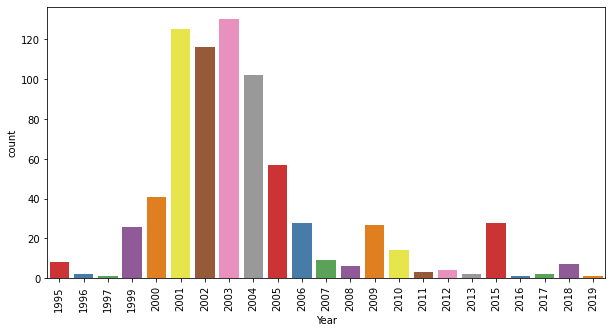

In [0]:
#ax = sns.countplot(x="Year",data=df3)
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df3,
    x='Year',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [0]:
#Starting to clean the data and select the interesting columns

#expanding windspeed column
df_weather[['winds_dir_angle', 'winds_dir_q', 'winds_type', 'winds_ms', 'winds_ms_q']] = df_weather['wnd'].str.split(',', expand = True)
df_weather['winds_ms'] = df_weather['winds_ms'].astype(float).apply(lambda x: x/10)
df_weather['winds_dir_angle'] = df_weather['winds_dir_angle'].astype(int)

#expanding ceiling height column
df_weather[['ceilingh_dim_m',	'ceilingh_q',	'ceilingh_det',	'ceilingh_det_q']] = df_weather['cig'].str.split(',', expand = True)
df_weather['ceilingh_dim_m'] = df_weather['ceilingh_dim_m'].astype(int)

#expanding visbility column
df_weather[['vis_dist_m',	'vis_dist_m_q',	'vis_var',	'vis_var_q']] = df_weather['vis'].str.split(',', expand = True)
df_weather['vis_dist_m'] = df_weather['vis_dist_m'].astype(int)

#expanding temperature column and fixing scale
df_weather[['temp_c', 'temp_c_q']] = df_weather['tmp'].str.split(',', expand = True)
df_weather['temp_c'] = df_weather['temp_c'].astype(float).apply(lambda x: x/10)

#expanding pressure column
df_weather[['sealevelp_hp',	'sealevelp_hp_q']] = df_weather['slp'].str.split(',', expand = True)
df_weather['sealevelp_hp'] = df_weather['sealevelp_hp'].astype(float).apply(lambda x: x/10)

#expanding dewpoint column
df_weather[['dewp_c',	'dewp_c_q']] = df_weather['dew'].str.split(',', expand = True)
df_weather['dewp_c'] = df_weather['dewp_c'].astype(float).apply(lambda x: x/10)

#expanding first rain column (aa1)
df_weather[['rain1_period_h', 'rain1_quantity_mm', 'rain1_cond', 'rain1_q']] = df_weather['aa1'].str.split(',', expand = True)
df_weather['rain1_quantity_mm'] = df_weather['rain1_quantity_mm'].astype(float).apply(lambda x: x/10)
df_weather['rain1_period_h'] = df_weather['rain1_period_h'].replace([None], 99).astype(int)

#expanding first rain column (aa2)
df_weather[['rain2_period_h', 'rain2_quantity_mm', 'rain2_cond', 'rain2_q']] = df_weather['aa2'].str.split(',', expand = True)
df_weather['rain2_quantity_mm'] = df_weather['rain2_quantity_mm'].astype(float).apply(lambda x: x/10)
df_weather['rain2_period_h'] = df_weather['rain2_period_h'].replace([None], 99).astype(int)

#expanding first rain column (aa3)
df_weather[['rain3_period_h', 'rain3_quantity_mm', 'rain3_cond', 'rain3_q']] = df_weather['aa3'].str.split(',', expand = True).iloc[:,:4]
df_weather['rain3_quantity_mm'] = df_weather['rain3_quantity_mm'].astype(float).apply(lambda x: x/10)
df_weather['rain3_period_h'] = df_weather['rain3_period_h'].replace([None], 99).astype(int)



In [0]:
#replacing unavailable values with NaN
df_weather.replace(to_replace={'ceilingh_dim_m':{99999: np.nan},
                               'winds_ms':{999.9: np.nan},
                               'winds_dir_angle':{999: np.nan},
                               'vis_dist_m':{999999:np.nan}, 
                               'temp_c':{999.9: np.nan}, 
                               'sealevelp_hp':{9999.9:np.nan}, 
                               'dewp_c':{999.9: np.nan},
                               'rain1_quantity_mm':{999.9: np.nan},
                               'rain1_period_h':{99: np.nan},
                               'rain2_quantity_mm':{999.9: np.nan},
                               'rain2_period_h':{99: np.nan},
                               'rain3_quantity_mm':{999.9: np.nan},
                               'rain3_period_h':{99: np.nan}},
                   inplace=True)

In [0]:
df_weather_dummy = pd.merge(date_df, df_weather, left_on='date', right_on='date', how= 'left')
df_weather = df_weather_dummy
#df_weather_new.set_index('date')

In [0]:
df_rain = df_weather[['date','rain1_quantity_mm', 'rain1_period_h',
                      'rain2_quantity_mm', 'rain2_period_h',
                      'rain3_quantity_mm', 'rain3_period_h','dewp_c' ]]
df_rain.set_index('date', inplace=True)

In [0]:
df_rain_full = pd.merge(date_df, df_rain, left_index=True, right_index=True, how= 'left')


In [0]:
df_weather['rain_hourly_1'] = np.nan
df_weather['rain_hourly_2'] = np.nan
df_weather['rain_hourly'] = np.nan
#df_rain_full.reset_index(inplace=True, drop=True)
#df_rain_full.rain1_period_h.replace(to_replace=np.nan, value= -999, inplace=True)
#df_rain_full['rain1_period_h'] = df_rain_full['rain1_period_h'].astype('int32')
#df_rain_full.rain1_period_h.replace(to_replace=-999, value= np.nan, inplace=True)

In [0]:
def rain_function(number):
  for i in range(1, number):
    if df_weather.loc[i,'rain1_quantity_mm'] > 0:
      for hour in range (0, df_weather.loc[i,'rain1_period_h'].astype('int32')):
        df_weather.loc[i - hour,'rain_hourly_1'] = df_weather.loc[i,'rain1_quantity_mm'] / df_weather.loc[i,'rain1_period_h']
    elif df_weather.loc[i,'rain1_quantity_mm'] == 0:
      for hour in range (0, df_weather.loc[i,'rain1_period_h'].astype('int32')):
        df_weather.loc[i - hour,'rain_hourly_1'] = 0
    else: df_weather.loc[i ,'rain_hourly_1'] = np.nan

def rain_function2(number):
  for i in range(1, number):
    if df_weather.loc[i,'rain2_quantity_mm'] > 0:
      for hour in range (0, df_weather.loc[i,'rain2_period_h'].astype('int32')):
        df_weather.loc[i - hour,'rain_hourly_2'] = df_weather.loc[i,'rain2_quantity_mm'] / df_weather.loc[i,'rain2_period_h']
    elif df_weather.loc[i,'rain2_quantity_mm'] == 0:
      for hour in range (0, df_weather.loc[i,'rain2_period_h'].astype('int32')):
        df_weather.loc[i - hour,'rain_hourly_2'] = 0
    else: df_weather.loc[i ,'rain_hourly_2'] = np.nan

In [0]:
rain_function(len(df_weather))

In [0]:
rain_function2(len(df_weather))

In [0]:
#df_weather[df_weather['rain_hourly_2'] == 0].head(50)

def max_rain(row):
  if np.isnan(row['rain_hourly_1']) and np.isnan(row['rain_hourly_2']):
    return np.nan
  elif row['rain_hourly_1'] == 0 or row['rain_hourly_2'] == 0:
    return 0
  else: return max(row['rain_hourly_1'], row['rain_hourly_2'])

In [0]:
df_weather['rain_hourly'] = df_weather.apply(lambda row: max_rain(row), axis=1)

In [0]:
def dewpoint_interpolation(row):
  if np.isnan(row['dewp_c']):
    return ['temp']-((100-['humidity'])/5)

In [0]:
print(df_rain_full['rain_hourly'].isna().sum())

print(df_rain_full.shape)

6554
(73033, 9)


In [0]:
#function to get avg rain qty over time
#def get_average_over_period(row, rain_quantity_var, rain_period_var):
#  if np.isnan(row[rain_period_var]):
#    return np.nan
#  elif row[rain_period_var] > 0:
#    return row[rain_quantity_var]/row[rain_period_var]
#  else:
#    return 0


#transforming the rain variables to get the average rain fall per hour rain1
#df_weather['rain_h_avg1'] = df_weather.apply(lambda row: get_average_over_period(row, 'rain1_quantity_mm', 'rain1_period_h'), axis=1)

#transforming the rain variables to get the average rain fall per hour rain2
#df_weather['rain_h_avg2'] = df_weather.apply(lambda row: get_average_over_period(row, 'rain2_quantity_mm', 'rain2_period_h'), axis=1)

#transforming the rain variables to get the average rain fall per hour rain3
#df_weather['rain_h_avg3'] = df_weather.apply(lambda row: get_average_over_period(row, 'rain3_quantity_mm', 'rain3_period_h'), axis=1)


In [0]:
def wind_deg_to_str(deg):
        if   deg < 11.25: return 'N'
        elif deg >=  11.25 and deg <  33.75: return 'NNE'
        elif deg >=  33.75 and deg <  56.25: return 'NE'
        elif deg >=  56.25 and deg <  78.75: return 'ENE'
        elif deg >=  78.75 and deg < 101.25: return 'E'
        elif deg >= 101.25 and deg < 123.75: return 'ESE'
        elif deg >= 123.75 and deg < 146.25: return 'SE'
        elif deg >= 146.25 and deg < 168.75: return 'SSE'
        elif deg >= 168.75 and deg < 191.25: return 'S'
        elif deg >= 191.25 and deg < 213.75: return 'SSW'
        elif deg >= 213.75 and deg < 236.25: return 'SW'
        elif deg >= 236.25 and deg < 258.75: return 'WSW'
        elif deg >= 258.75 and deg < 281.25: return 'W'
        elif deg >= 281.25 and deg < 303.75: return 'WNW'
        elif deg >= 303.75 and deg < 326.25: return 'NW'
        elif deg >= 326.25 and deg < 348.75: return 'NNW'
        elif deg > 348.75 and deg <= 360: return 'N'
        else: return np.nan

df_weather['winds_dir_str'] = df_weather['winds_dir_angle'].apply(lambda x: wind_deg_to_str(x))

####Cleaning data

In [0]:
#making a DF with only the interesting columns
df_weather_small = df_weather[['date', 'winds_dir_str', 'winds_dir_angle', 'winds_dir_q', 'winds_type', 'winds_ms', 'winds_ms_q', 'ceilingh_dim_m', 
                               'ceilingh_q', 'ceilingh_det', 'ceilingh_det_q', 'vis_dist_m','vis_dist_m_q', 'vis_var', 
                               'vis_var_q', 'temp_c', 'temp_c_q', 'sealevelp_hp', 'sealevelp_hp_q', 'dewp_c', 'dewp_c_q',
                               'rain_hourly']]

In [0]:
#looking at which columen contains most missing data and how it is distributed
import missingno as msno
msno.matrix(df_weather_small);
#msno.matrix(df_weather_small.set_index(pd.period_range('1/1/1995', '1/3/2020', freq='D')) , freq='BQ')

NameError: ignored

####Analyzing data

In [0]:
from google.colab import files

df_weather_small.to_csv('Weather_Small.csv')
files.download('Weather_Small.csv')

In [0]:
df_weather_small['temp_c_rolling'] = np.round(df_weather_small.iloc[:,14].rolling(window=7).mean(),2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_tmp_small = df_weather_small[['date','temp_c_rolling']]
df_tmp_small = df_tmp_small.resample('D', on='date').mean()
df_tmp_small.temp_c_rolling.interpolate(method ='linear', limit_direction ='backward', inplace=True)

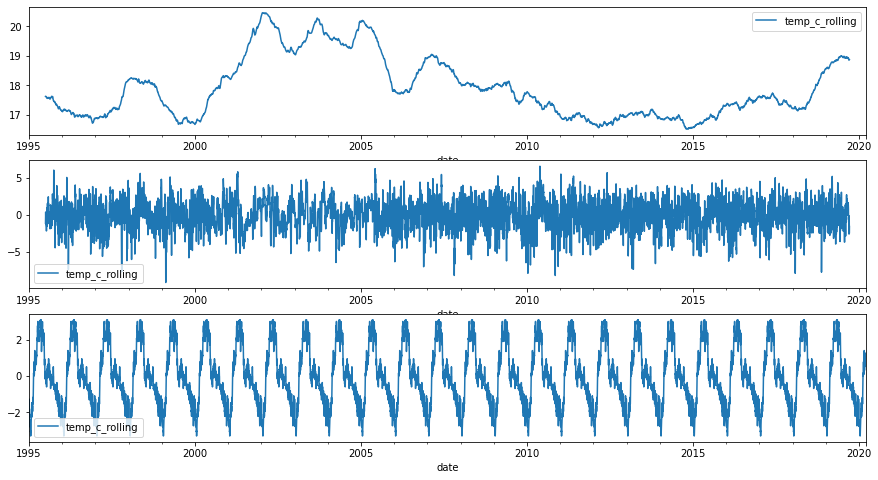

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

#plt.figure(figsize= (20,10))
result = seasonal_decompose(df_tmp_small[df_tmp_small.index >= '1995-01-01'], model='additive', freq=365)
#result.plot()

import matplotlib.pyplot as plt 
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)

In [0]:
df_weather_small['temp_c_rolling_exp'] = np.round(df_weather_small.iloc[:,14].ewm(span=7).mean(),2)
df_tmp_small_exp = df_weather_small[['date','temp_c_rolling_exp']]
df_tmp_small_exp = df_tmp_small_exp.resample('D', on='date').mean()
df_tmp_small_exp.temp_c_rolling_exp.interpolate(method ='linear', limit_direction ='backward', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



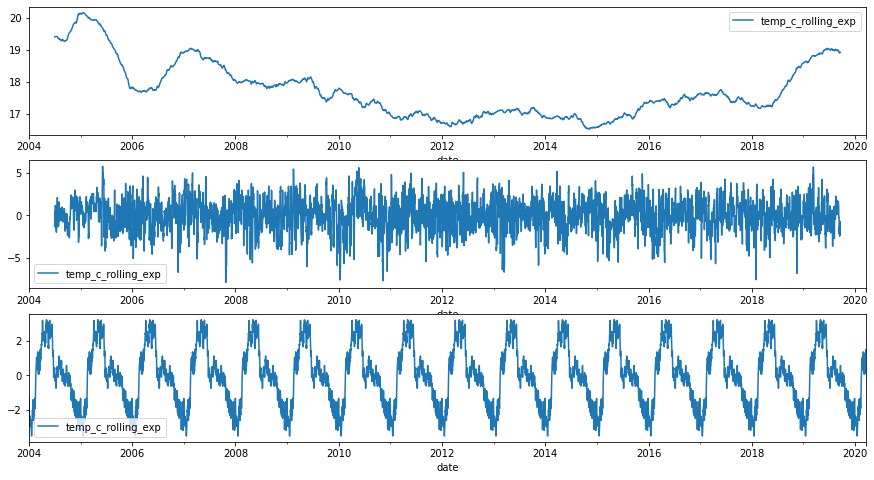

In [0]:
#plt.figure(figsize= (20,10))
result = seasonal_decompose(df_tmp_small_exp[df_tmp_small_exp.index >= '2004-01-01'], model='additive', freq=365)
#result.plot()

import matplotlib.pyplot as plt 
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)

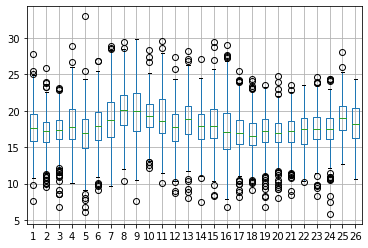

In [0]:
df_weather_avg = df_weather_small.resample('D', on='date').mean()

#looking at how mean daily temperature changes throughout the years
group_temp = df_weather_avg['temp_c'].groupby(pd.Grouper(freq='Y'))
group_temp
months_temp = pd.concat([pd.DataFrame(x[1].values) for x in group_temp], axis=1)
months_temp = pd.DataFrame(months_temp)
months_temp.columns = range(1,27)
months_temp.boxplot()
plt.show()

In [0]:
df_weather_avgm = df_weather_small.resample('M', on='date').mean()

fig = px.scatter_polar(df_weather_avgm, r=df_weather_avgm.index, theta="winds_dir_angle")
fig.show()

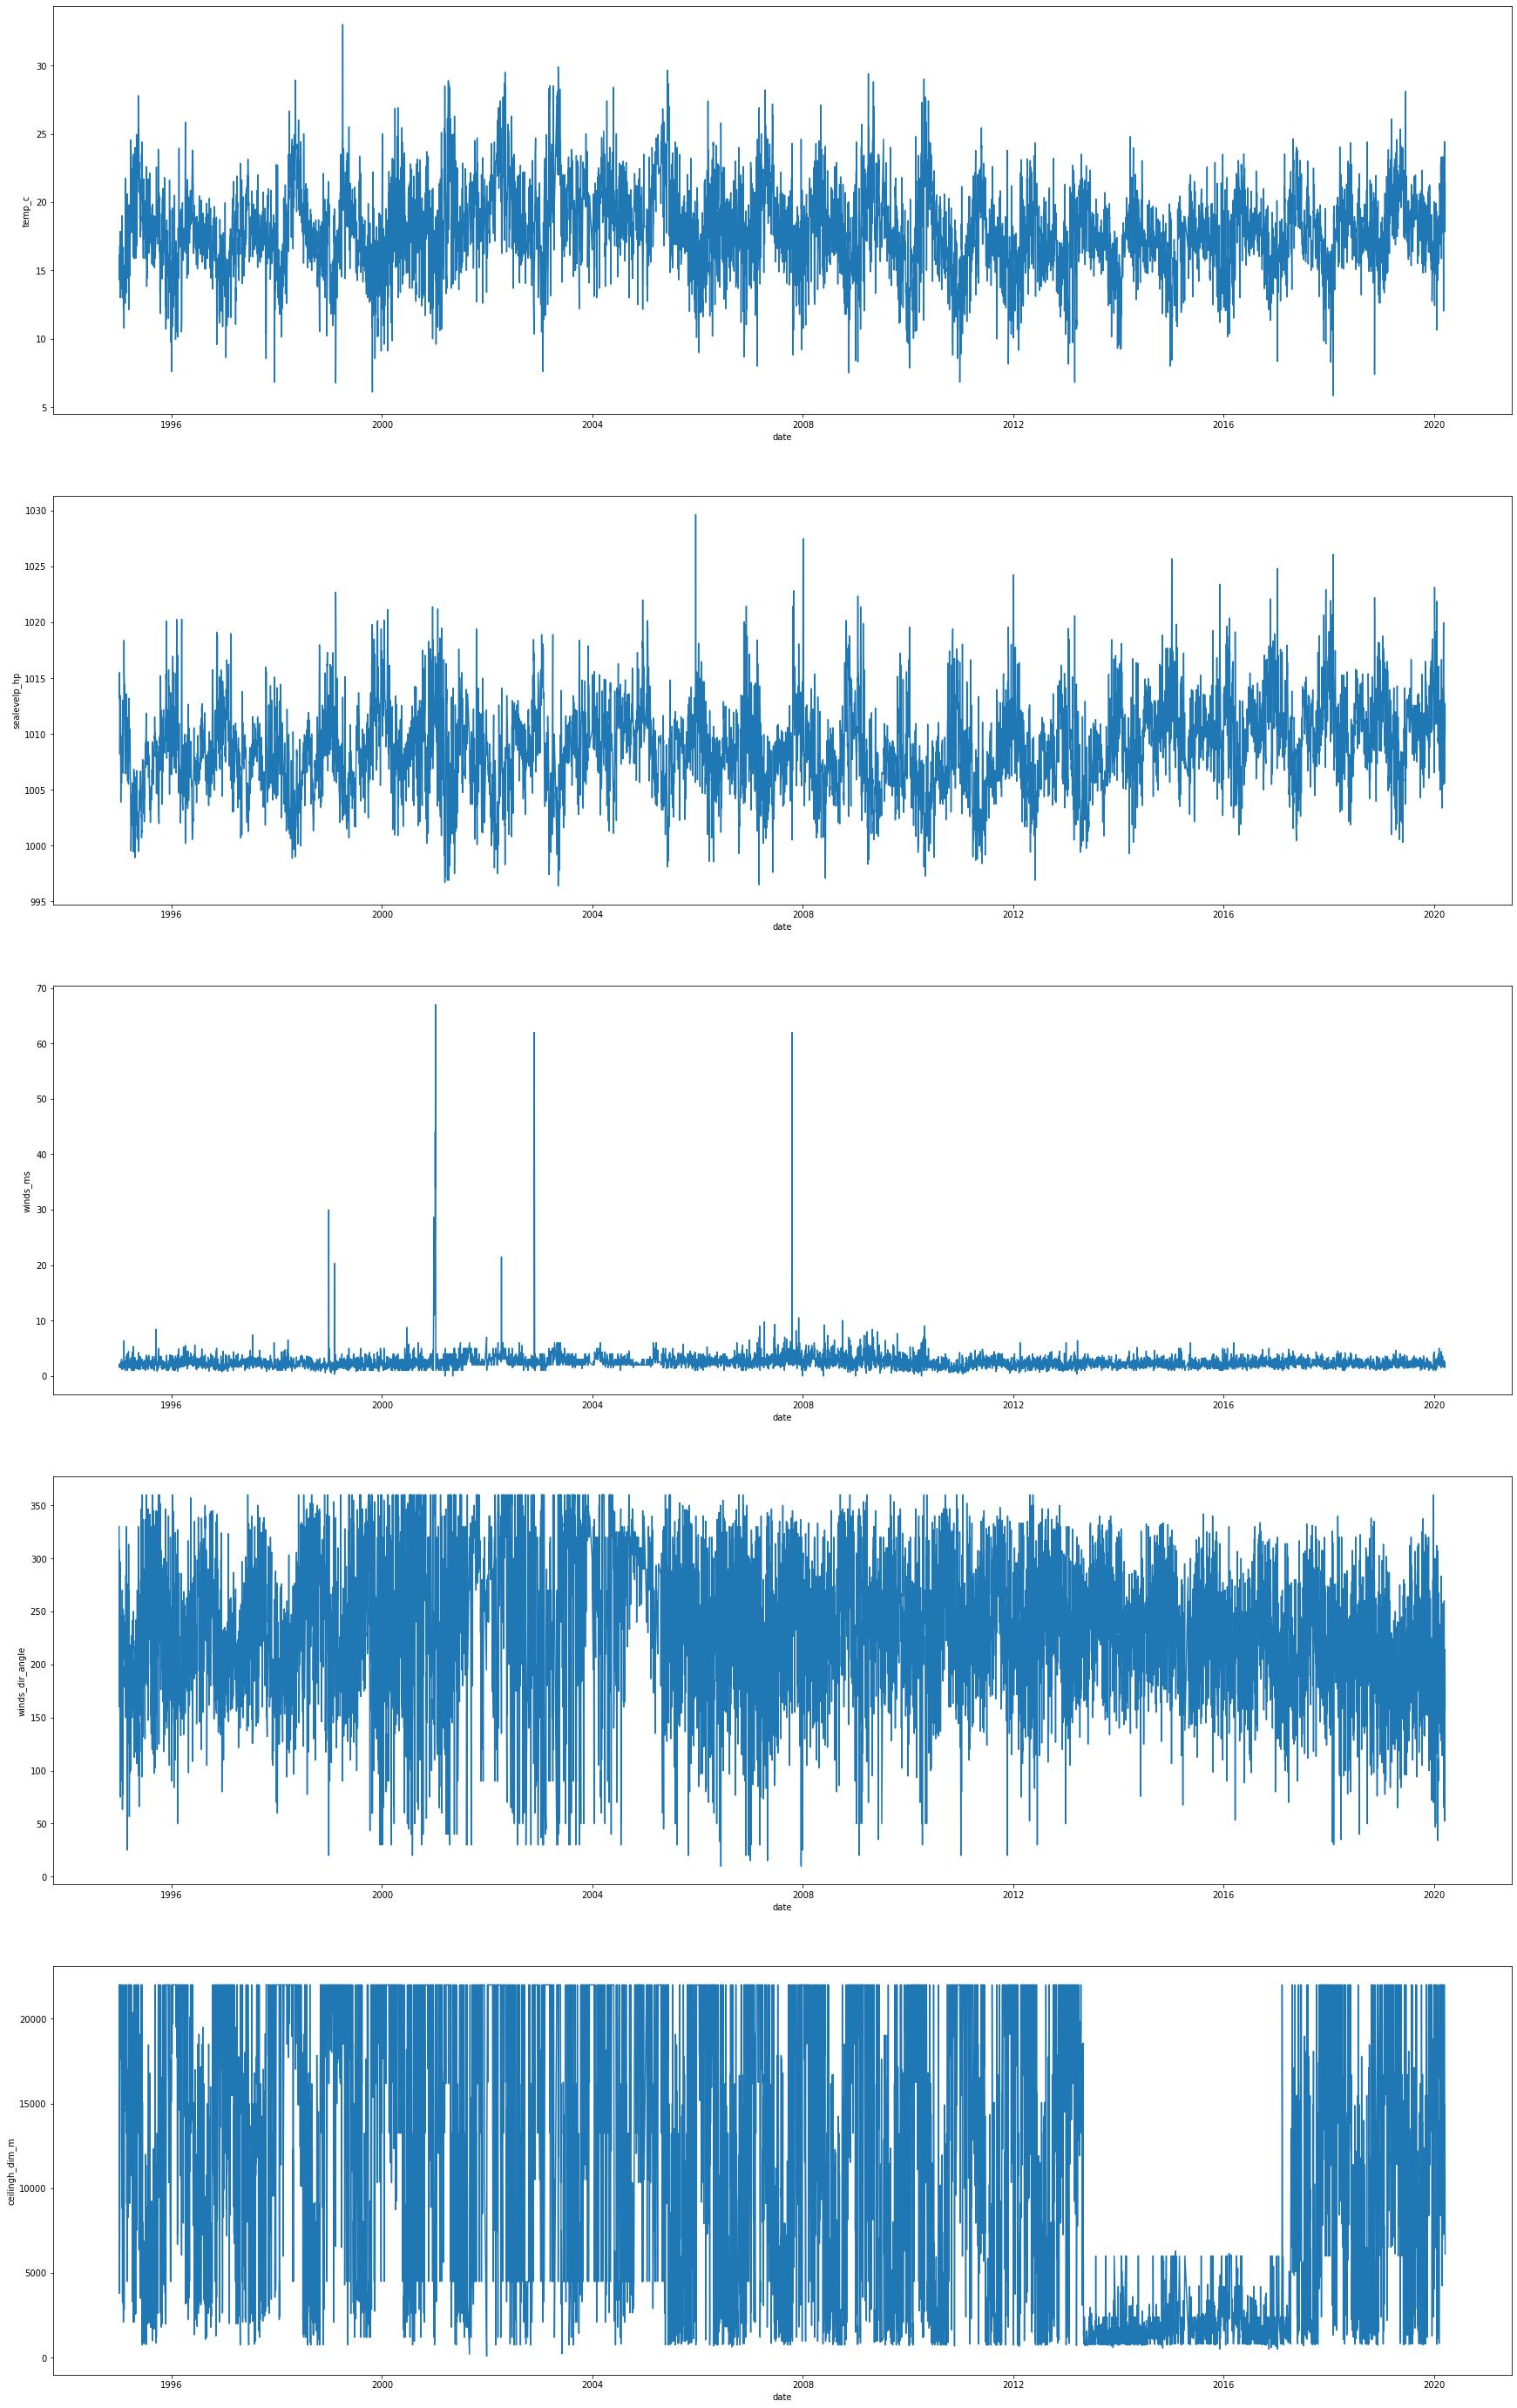

In [0]:
#g = sns.FacetGrid(df_weather_small, col=df_weather_small['date'].dt.year, col_wrap=4, height=2)
#g.map(sns.pointplot, df_weather_small["date"], df_weather_small["temp_c"], color=".3", ci=None);

fig, ax = plt.subplots(5, figsize=(30,50))

g1 = sns.lineplot(x=df_weather_avg.index, y="temp_c", data=df_weather_avg, ax=ax[0])
g2 = sns.lineplot(x=df_weather_avg.index, y="sealevelp_hp", data=df_weather_avg, ax=ax[1])
g3 = sns.lineplot(x=df_weather_avg.index, y="winds_ms", data=df_weather_avg, ax=ax[2])
g4 = sns.lineplot(x=df_weather_avg.index, y="winds_dir_angle", data=df_weather_avg, ax=ax[3])
g5 = sns.lineplot(x=df_weather_avg.index, y="ceilingh_dim_m", data=df_weather_avg, ax=ax[4])


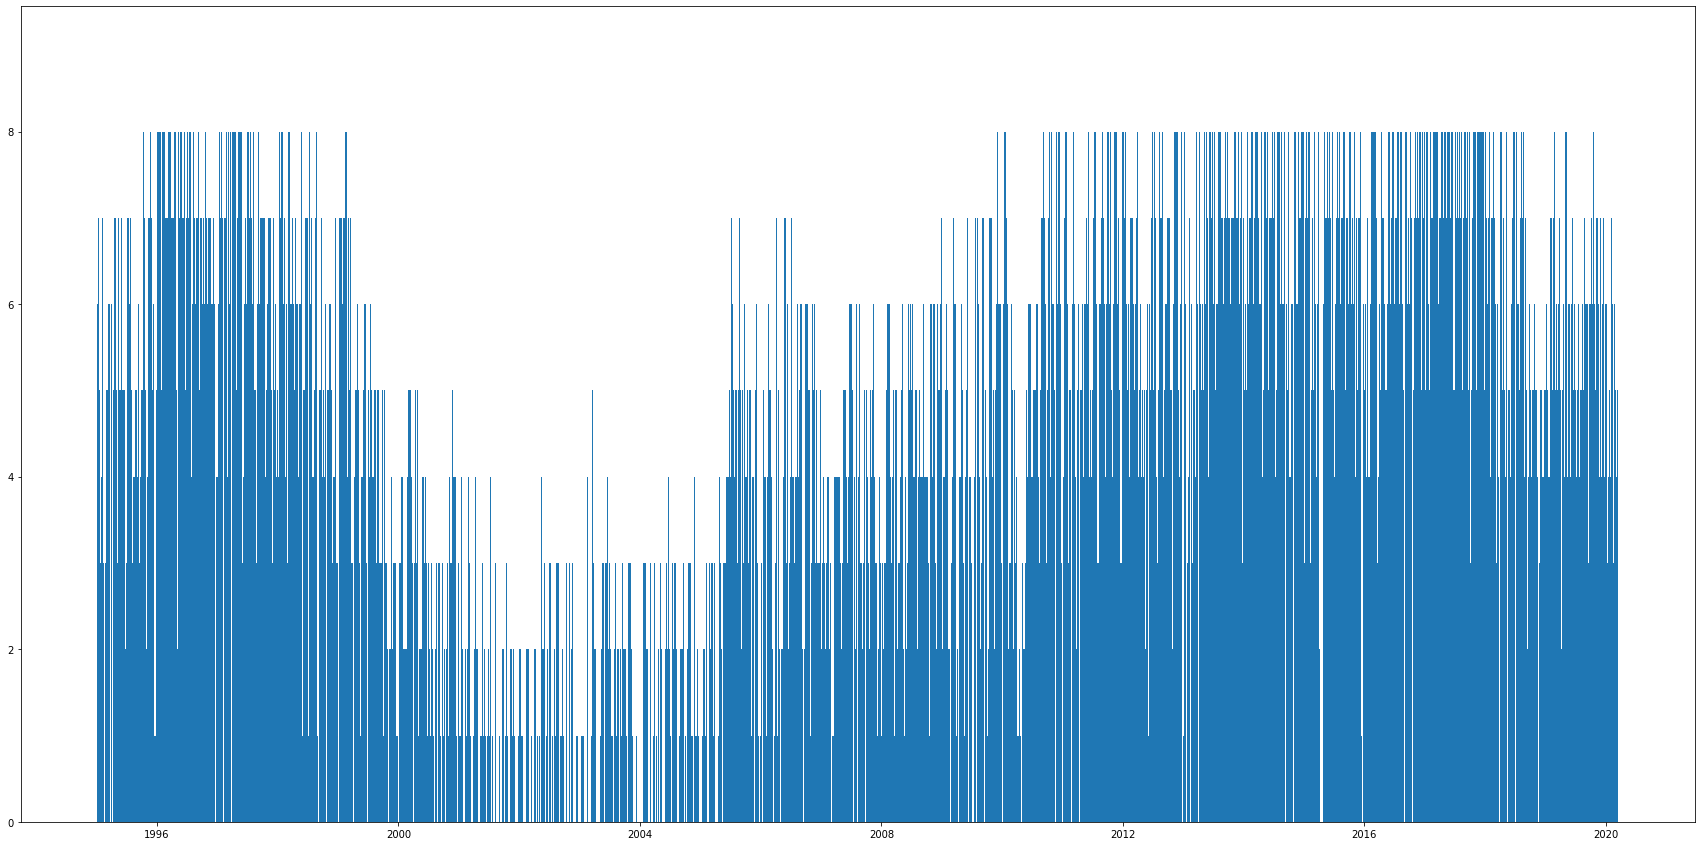

In [0]:
plt.figure(figsize=(30,15))
plt.hist(df_weather_small['date'].dt.date, bins=9400)
plt.show();

###Contaminant Data

In [0]:
#Importing the rama dataset on contaminants

sqlQuery_rama = "select * from raw_metrics.rama where date >= '1995-01-01'::date ORDER BY date asc;"

df_rama = pd.DataFrame(runquery(sqlQuery_rama))

In [0]:
df_rama.columns

Index(['date', 'fecha', 'hora', 'factor', 'aco', 'ajm', 'aju', 'ara', 'ati',
       'azc', 'bju', 'cam', 'cca', 'ces', 'cho', 'coy', 'cua', 'cui', 'cut',
       'fac', 'far', 'gam', 'han', 'hgm', 'imp', 'inn', 'izt', 'lag', 'lla',
       'lpr', 'lvi', 'mer', 'mgh', 'min', 'mon', 'mpa', 'net', 'nez', 'ped',
       'per', 'pla', 'sac', 'sag', 'sfe', 'sja', 'sur', 'tac', 'tah', 'tax',
       'tla', 'tli', 'tpn', 'uax', 'uiz', 'val', 'vif', 'xal'],
      dtype='object')

In [0]:
df_o3 = df_rama[(df_rama['factor']=='O3') & (df_rama['date'].dt.date >= pd.to_datetime('2012-01-01').date())]


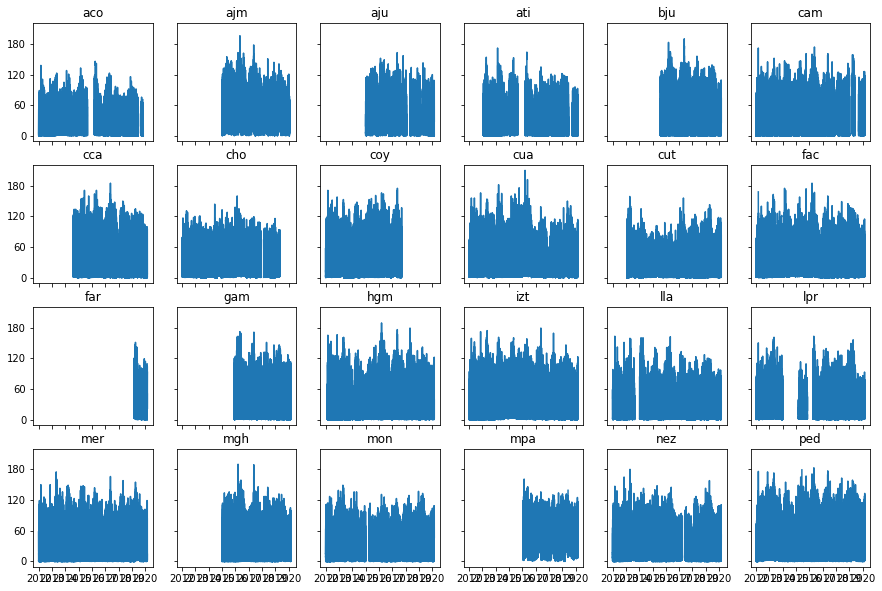

In [0]:
stations = ['aco', 'ajm', 'aju', 'ati', 'bju', 'cam', 'cca', 'cho', 'coy', 'cua', 'cut',
       'fac', 'far', 'gam', 'hgm', 'izt', 'lla',
       'lpr', 'mer', 'mgh', 'mon', 'mpa',  'nez', 'ped']

fig, axes = plt.subplots(4, 6, figsize=(15, 10), sharex=True, sharey=True)

for col, ax in zip(stations, axes.flatten()):
    ax.plot(df_o3.date, df_o3[col])
    ax.set_title(col)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

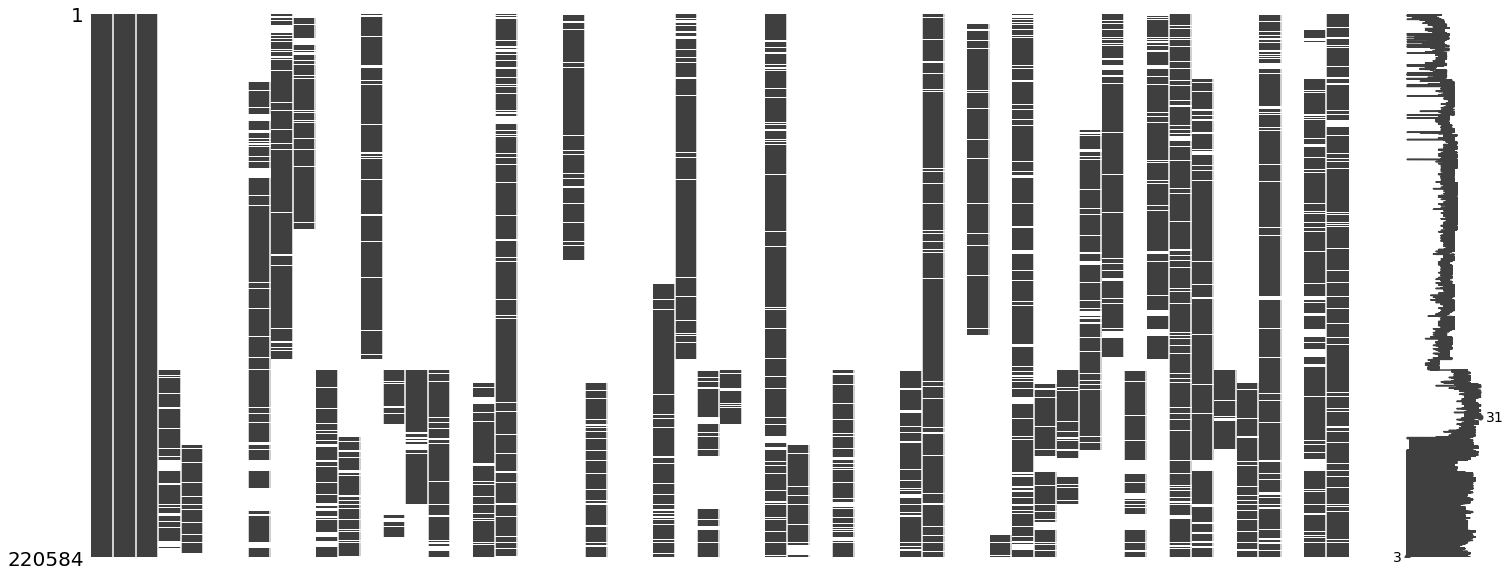

In [0]:
import missingno as msno
msno.matrix(df_o3.set_index());

In [0]:
df_rama.head()

,date,fecha,hora,factor,aco,ajm,aju,ara,ati,azc,bju,cam,cca,ces,cho,coy,cua,cui,cut,fac,far,gam,han,hgm,imp,inn,izt,lag,lla,lpr,lvi,mer,mgh,min,mon,mpa,net,nez,ped,per,pla,sac,sag,sfe,sja,sur,tac,tah,tax,tla,tli,tpn,uax,uiz,val,vif,xal
0,1995-01-01,1995-01-01,0,PM10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.0,NaN,183.0,178.0,NaN,NaN,NaN,NaN,207.0,2.0
1,1995-01-01,1995-01-01,0,NO2,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,47.0,NaN,NaN,NaN,None,NaN,26.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,34.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,53.0,NaN,NaN,31.0
2,1995-01-01,1995-01-01,0,SO2,NaN,NaN,NaN,16.0,NaN,17.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,None,NaN,6.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,14.0,11.0,6.0,6.0,16.0,NaN,NaN,NaN,NaN,14.0,NaN,7.0,NaN,7.0,NaN,14.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,6.0
3,1995-01-01,1995-01-01,0,CO,NaN,NaN,NaN,5.4,NaN,3.5,NaN,NaN,NaN,4.6,NaN,NaN,NaN,None,NaN,1.3,NaN,NaN,3.6,NaN,4.3,NaN,NaN,5.7,NaN,NaN,NaN,1.3,NaN,2.9,NaN,NaN,8.5,NaN,2.5,NaN,1.9,NaN,2.0,NaN,NaN,NaN,1.2,NaN,NaN,0.7,NaN,NaN,NaN,NaN,3.9,NaN,2.6
4,1995-01-01,1995-01-01,0,O3,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,None,NaN,8.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN,13.0,NaN,NaN,NaN,14.0,NaN,NaN,14.0,NaN,NaN,NaN,29.0,NaN,NaN,10.0


In [0]:
df_rama.isnull().sum()

date            0
fecha           0
hora            0
factor          0
aco       1225600
ajm       1338996
aju       1650757
ara       1493758
ati        873348
azc       1027673
bju       1078250
cam       1092818
cca       1407116
ces        878271
cho       1345134
coy       1346895
cua       1132020
cui       1704744
cut       1347916
fac        411705
far       1669783
gam       1620092
han       1160826
hgm       1151366
imp       1581887
inn       1540376
izt       1001157
lag        976995
lla       1299769
lpr       1353385
lvi       1445788
mer        159817
mgh       1359186
min       1610390
mon       1226187
mpa       1565071
net       1585340
nez       1254914
ped        271141
per       1641016
pla        943632
sac       1650153
sag        306253
sfe       1230696
sja       1352799
sur        861884
tac        996848
tah        939139
tax        938408
tla        176021
tli        654782
tpn       1442208
uax       1259595
uiz        351907
val       1457671
vif       

###Measuring Stations

In [0]:
#Importing the rama dataset on contaminants

sqlQuery_stations = "select * from stations.stations_cdmx;"

df_stations = pd.DataFrame(runquery(sqlQuery_stations))

In [0]:
df_stations

,index,cve_estac,nom_estac,longitud,latitud,alt,obs_estac,id_station,geometry
0,0,ACO,Acolman,-98.912003,19.635501,2198.0,None,484150020109,0101000020E6100000A6B6D4415EBA58C047938B31B0A2...
1,1,AJU,Ajusco,-99.162611,19.154286,2942.0,None,484090120400,0101000020E610000012BEF73768CA58C00C3B8C497F27...
2,2,AJM,Ajusco Medio,-99.207744,19.272161,2548.0,None,484090120609,0101000020E61000002C7C7DAD4BCD58C0253FE257AC45...
3,3,ARA,Aragón,-99.074549,19.470218,2200.0,Finalizó operación en 2010,484090050301,0101000020E6100000C53C2B69C5C458C093FDF3346078...
4,4,ATI,Atizapan,-99.254133,19.576963,2341.0,None,484150130101,0101000020E610000066F50EB743D058C08600E0D8B393...
...,...,...,...,...,...,...,...,...,...
64,64,VIF,Villa de las Flores,-99.096590,19.658223,2242.0,None,484150200109,0101000020E6100000B9C7D2872EC658C09A79724D81A8...
65,65,XAL,Xalostoc,-99.082400,19.525995,2160.0,None,484150330415,0101000020E6100000304CA60A46C558C00ADCBA9BA786...
66,66,XCH,Xochimilco,-99.118252,19.267066,2243.0,Finalizó operación en 1999,484090130102,0101000020E6100000F12BD67091C758C0A0DFF76F5E44...
67,67,FAR,FES Aragón,-99.046176,19.473692,2230.0,None,484800150584,0101000020E61000000C772E8CF4C258C0786000E14379...


In [0]:
df_stations.isnull().sum()

index          0
cve_estac      0
nom_estac      0
longitud       0
latitud        0
alt            1
obs_estac     49
id_station     0
geometry       0
dtype: int64

In [0]:
df_stations['obs_estac'].notnull().count()

69

# Visualize on Map

In [0]:
!pip install pyshp

###Pressure Data

In [0]:
sqlQuery_presion = "select * from raw_metrics.presion where date >= '1995-01-01'::date ORDER BY date asc ;"
df_presion = runquery(sqlQuery_presion)   

In [0]:
df_presion.head()

,date,fecha,hora,factor,ajm,cut,hgm,inn,laa,mer,mon,mpa,tla,xal
0,2009-01-01 00:00:00,2009-01-01,0,PA,NaN,NaN,NaN,NaN,NaN,588.0,NaN,NaN,NaN,NaN
1,2009-01-01 01:00:00,2009-01-01,1,PA,NaN,NaN,NaN,NaN,NaN,587.0,NaN,NaN,NaN,NaN
2,2009-01-01 02:00:00,2009-01-01,2,PA,NaN,NaN,NaN,NaN,NaN,587.0,NaN,NaN,NaN,NaN
3,2009-01-01 03:00:00,2009-01-01,3,PA,NaN,NaN,NaN,NaN,NaN,587.0,NaN,NaN,NaN,NaN
4,2009-01-01 04:00:00,2009-01-01,4,PA,NaN,NaN,NaN,NaN,NaN,587.0,NaN,NaN,NaN,NaN


In [0]:
df_presion.isnull().sum()

date          0
fecha         0
hora          0
factor        0
ajm       56787
cut       61124
hgm       43295
inn       64616
laa       71136
mer        5942
mon       82295
mpa       75619
tla       34782
xal       45900
dtype: int64

In [0]:
df_presion.shape

(97104, 14)

In [0]:
#fill na with each column's mean to do some checks on data
df_weather_avg_cleaned = df_weather_avg.apply(lambda x: x.fillna(x.mean()),axis=0)

In [0]:
df_weather_avg_cleaned.head(5)

,winds_dir_angle,winds_ms,ceilingh_dim_m,vis_dist_m,temp_c,sealevelp_hp,dewp_c,rain_h_avg1,rain_h_avg2,rain_h_avg3,temp_c_rolling,temp_c_rolling_exp
date,,,,,,,,,,,,
1995-01-01,330.000000,2.000000,22000.000000,5000.000000,16.100000,1013.300000,8.100000,0.0,0.269022,0.086481,17.805074,16.100000
1995-01-02,160.000000,2.000000,3800.000000,3000.000000,14.533333,1015.500000,6.166667,0.0,0.269022,0.086481,17.805074,14.010000
1995-01-03,207.142857,1.857143,9283.333333,5428.571429,14.300000,1013.185714,4.985714,0.0,0.000000,0.086481,14.326000,14.467143
1995-01-04,308.000000,1.600000,6080.000000,4200.000000,14.940000,1013.580000,4.520000,0.0,0.269022,0.086481,14.236000,14.544000
1995-01-05,238.571429,1.833333,6271.428571,3571.428571,14.914286,1012.157143,4.616667,0.0,0.000000,0.086481,14.847143,14.748571


In [0]:
df_weather_avg_cleaned.isnull().sum()

winds_dir_angle       0
winds_ms              0
ceilingh_dim_m        0
vis_dist_m            0
temp_c                0
sealevelp_hp          0
dewp_c                0
rain_h_avg1           0
rain_h_avg2           0
rain_h_avg3           0
temp_c_rolling        0
temp_c_rolling_exp    0
dtype: int64

In [0]:
df_weather_avg_cleaned.shape

(9209, 12)

In [0]:
#https://machinelearningmastery.com/time-series-data-stationary-python/
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
def test_stationarity(timeseries):
  print("Results of Dickey-Fuller Test:")
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)



Augmented Dickey-Fuller test

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [0]:
#check for winds_dir_angle 
test_stationarity(df_weather_avg_cleaned['winds_dir_angle'])

Results of Dickey-Fuller Test:
Test Statistic                -8.104391e+00
p-value                        1.274376e-12
#Lags Used                     3.700000e+01
Number of Observations Used    9.171000e+03
Critical Value (1%)           -3.431063e+00
Critical Value (5%)           -2.861855e+00
Critical Value (10%)          -2.566938e+00
dtype: float64


# Multivariate Time Series Forecasting with  Long Short-Term Memory (LSTM) recurrent neural networks in Keras 

**reference: Deep Air: Forecasting Air Pollution in Beijing, China**


Due to the sequence dependencies associated with large-scale and longer time series datasets, RNNs, and in particular LSTM models, are well-suited. 


LSTMs take as inputs not only the current
input, but also what they have ”perceived” previously in time,
essentially using the output at time t-1, as an input to time t
along with the new input at time t.

Given this, the network effectively has ’memory,’ unlike feedforward networks.

This characteristic is important because there is often information in the sequence itself, and not just the outputs. Because air pollution varies temporally and since health risks are due to long-term exposures to, it is understood that the best
PM2: predictor of future air pollution is previous air pollution over long time periods.



Sepp Hochreiter and J¨urgen Schmidhuber. “Long Short-Term Memory”. In: Neural Comput. 9.8 (Nov. 1997), pp. 1735–
1780. ISSN: 0899-7667. DOI: 10.1162/neco.1997.9.8.1735. URL: http://dx.doi.org/10.1162/ neco.1997.9.8.1735.


Xiang Li et al. “Deep learning architecture for air quality predictions”. In: 23 (Oct. 2016).





Relevant features to forecast pollution are cumulative rain hours, wind speed, wind direction, dew point, air temperature, and air pressure.

 - Temperature is a physical property of matter that quantitatively expresses hot and cold. It is the manifestation of thermal energy, present in all matter, which is the source of the occurrence of heat, a flow of energy, when a body is in contact with another that is colder. 

 - the dew point is the temperature at which the water vapor in a sample of air at constant barometric pressure condenses into liquid water at the same rate at which it evaporates.

- Atmospheric or air pressure is the force per unit of area exerted on the Earth’s surface by the weight of the air above the surface. The force exerted by an air mass is created by the molecules that make it up and their size, motion, and number present in the air. These factors are important because they determine the temperature and density of the air and, thus, its pressure. Pressure on Earth varies with the altitude of the surface; so air pressure on mountains is usually lower than air pressure at sea level. Pressure varies smoothly from the Earth's surface to the top of the mesosphere.  






In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
import time
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def create_list_range(start, end, step):
  return np.arange(start, end, step).tolist()

def get_reframed_series(values_to_use, n_in, n_out, do_not_predict_number_of_columns):
  # normalize features (reframe into a supervised learning problem)
  # frame as supervised learning  
  reframed = series_to_supervised(values_to_use, n_in, n_out)
  # drop columns we don't want to predict
  #these columns are the last ones
  which_columns = create_list_range(  do_not_predict_number_of_columns * -1  , 0, 1)
  reframed.drop(reframed.columns[ which_columns ], axis=1, inplace=True)
  print(reframed.head())
  return reframed

  







# USING test_pollution.csv as final dataset 

In [0]:
# load dataset_to_use
dataset_to_use = pd.read_csv('/content/drive/My Drive/DS4A-MX7/test_pollution.csv', header=0, index_col=0)
values_to_use = dataset_to_use.values
# integer encode direction
encoder = LabelEncoder()
values_to_use[:,4] = encoder.fit_transform(values_to_use[:,4])
# ensure all data is float
values_to_use = values_to_use.astype('float32')


In [0]:
dataset_to_use.head(5)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [0]:
dataset_to_use.shape

(43800, 8)

In [0]:
dataset_to_use.isnull().sum()

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [0]:
# normalize features (reframe into a supervised learning problem)
# frame as supervised learning -
####### Can change t_input timesteps here ##########  ### I changed it to time lag = 4
reframed = series_to_supervised(values_to_use, 48, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-7,-6,-5,-4,-3,-2,-1]], axis=1, inplace=True)
print(reframed.head())

    var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
48       129.0       -16.0        -4.0      1020.0         2.0        1.79   
49       148.0       -15.0        -4.0      1020.0         2.0        2.68   
50       159.0       -11.0        -5.0      1021.0         2.0        3.57   
51       181.0        -7.0        -5.0      1022.0         2.0        5.36   
52       138.0        -7.0        -5.0      1022.0         2.0        6.25   

    var7(t-48)  var8(t-48)  var1(t-47)  var2(t-47)  var3(t-47)  var4(t-47)  \
48         0.0         0.0       148.0       -15.0        -4.0      1020.0   
49         0.0         0.0       159.0       -11.0        -5.0      1021.0   
50         0.0         0.0       181.0        -7.0        -5.0      1022.0   
51         1.0         0.0       138.0        -7.0        -5.0      1022.0   
52         2.0         0.0       109.0        -7.0        -6.0      1022.0   

    var5(t-47)  var6(t-47)  var7(t-47)  var8(t-47)  var1(t-46)

In [0]:
# split into train and test sets
values_to_use = reframed.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(values_to_use[:,:-1])
scaled_label = scaler.fit_transform(values_to_use[:,-1].reshape(-1,1))
values_to_use = np.column_stack((scaled_features, scaled_label))


In [0]:
n_train_hours = 365 * 24 * 4
train = values_to_use[:n_train_hours, :]
test = values_to_use[n_train_hours:, :]
# split into input and outputs
# features take all values except the var1
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

(35040, 1, 384) (35040,) (8712, 1, 384) (8712,)


Train on 35040 samples, validate on 8712 samples
Epoch 1/25
35040/35040 [==============================] - 5s 133us/step - loss: 0.0472 - val_loss: 0.0480
Epoch 2/25
35040/35040 [==============================] - 4s 115us/step - loss: 0.0322 - val_loss: 0.0425
Epoch 3/25
35040/35040 [==============================] - 4s 114us/step - loss: 0.0284 - val_loss: 0.0360
Epoch 4/25
35040/35040 [==============================] - 4s 115us/step - loss: 0.0252 - val_loss: 0.0252
Epoch 5/25
35040/35040 [==============================] - 4s 113us/step - loss: 0.0233 - val_loss: 0.0213
Epoch 6/25
35040/35040 [==============================] - 4s 114us/step - loss: 0.0240 - val_loss: 0.0290
Epoch 7/25
35040/35040 [==============================] - 4s 114us/step - loss: 0.0214 - val_loss: 0.0200
Epoch 8/25
35040/35040 [==============================] - 4s 113us/step - loss: 0.0219 - val_loss: 0.0186
Epoch 9/25
35040/35040 [==============================] - 4s 114us/step - loss: 0.0211 - val_loss: 0.01

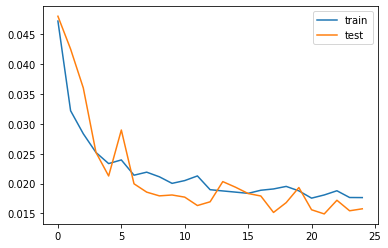

This took 101.50081086158752 seconds.
Test RMSE: 26.738


In [0]:
start = time.time()

# fit network
###################### Can change Epochs, Batch size here #######################
history = model.fit(train_X, train_y, epochs=25, batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
end = time.time()
print('This took {} seconds.'.format(end - start))
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [0]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Prediction vs. Actual after 100 epochs of training')
    ax.plot(true_data, label='True Data', color='green', linewidth='3')

    ax.plot(predicted_data, label='Prediction', color='red', linewidth='2')
    plt.legend()
    plt.show()

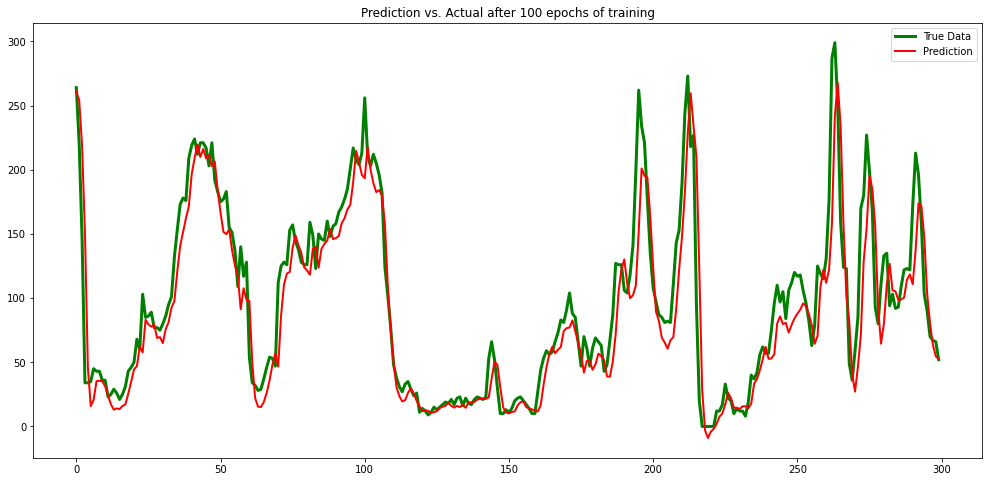

In [0]:
plot_predicted(inv_yhat[:300,], inv_y[:300,])

In [0]:
print('Root Mean Squared Error: {:.4f}'.format(rmse))

#Calculate R^2 (regression score function)
# r2_score(y, data_pred))
print('Variance score: {:2f}'.format(r2_score(inv_y, inv_yhat)))

Root Mean Squared Error: 26.7382
Variance score: 0.918556


# Nonlinear Regression Analysis

Support Vector Regression (SVR)


In [0]:
n_train_hours = 365 * 24 + (365 * 48)
train = values_to_use[:n_train_hours, :]
test = values_to_use[n_train_hours:-365*24, :]
# split into input and outputs
# features take all values except the var1
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [0]:
from sklearn.svm import SVR

x = train_X
y = train_y

regr = SVR(C = 2.0, epsilon = 0.1, kernel = 'rbf', gamma = 0.5, 
           tol = 0.001, verbose=False, shrinking=True, max_iter = 10000)

regr.fit(x, y)
data_pred = regr.predict(x)
y_pred = scaler.inverse_transform(data_pred.reshape(-1,1))
y_inv = scaler.inverse_transform(y.reshape(-1,1))

mse = mean_squared_error(y_inv, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))

print('Variance score: {:2f}'.format(r2_score(y_inv, y_pred)))

Mean Squared Error: 5022.2444
Root Mean Squared Error: 70.8678
Variance score: 0.375125


# Plot Predictions vs Actual 

In [0]:
def plot_preds_actual(preds, actual):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.plot(preds, color='red', label='Predicted data')
    ax.plot(actual, color='green', label='True data')
    ax.set_xlabel('Hourly Timestep in First Month of Predicted Year', fontsize=16)
    ax.set_ylabel('Pollution [pm2.5]', fontsize=16)
    ax.set_title('Nonlinear Regression using SVR on Test set', fontsize=16)
    ax.legend()
    plt.show()

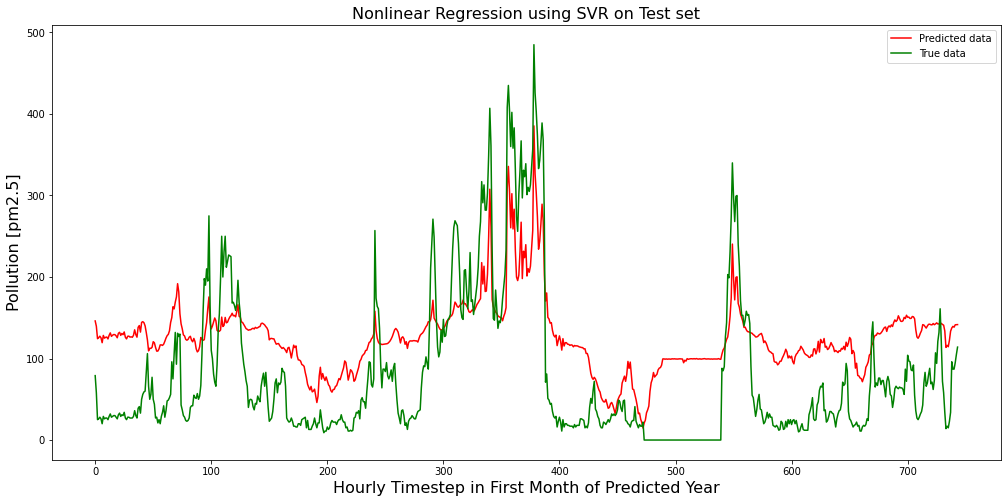

In [0]:
plot_preds_actual(y_pred[:24*31*1,], y_inv[:24*31*1,])

# Predict on test

In [0]:
def run_test_nonlinear_reg(x, y):
    data_pred = regr.predict(x)
    y_pred = scaler.inverse_transform(data_pred.reshape(-1,1))
    y_inv = scaler.inverse_transform(y.reshape(-1,1))

    mse = mean_squared_error(y_inv, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error: {:.4f}'.format(mse))
    print('Root Mean Squared Error: {:.4f}'.format(rmse))

    #Calculate R^2 (regression score function)
    print('Variance score: {:2f}'.format(r2_score(y_inv, y_pred)))
    return y_pred, y_inv

In [0]:
y_pred, y_inv = run_test_nonlinear_reg(test_X, test_y)

Mean Squared Error: 7865.1573
Root Mean Squared Error: 88.6857
Variance score: 0.183862


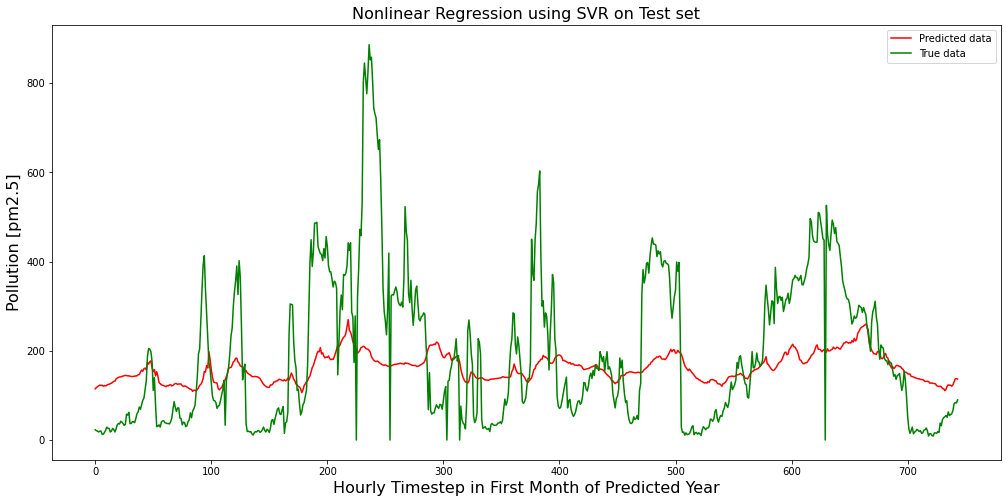

In [0]:
plot_preds_actual(y_pred[:24*31*1,], y_inv[:24*31*1,])

In [0]:
print('Root Mean Squared Error: {:.4f}'.format(rmse))

#Calculate R^2 (regression score function)
print('Variance score: {:2f}'.format(r2_score(y_inv, y_pred)))

Root Mean Squared Error: 70.8678
Variance score: 0.183862


# Mexico's Dataset